In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
df=pd.read_excel('/Users/getinetayele/Desktop/DataScience/Dat121-project/Dat121-project/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
# how each variable impacts PE, using a scatter plot
def scatter_plot(feature, target):
    plt.figure(figsize=(20, 10))
    plt.scatter(
        df[feature],
        df[target],
        c='black'
    )
    plt.xlabel("Parameter {} ".format(feature))
    plt.ylabel("PE")
    plt.show()

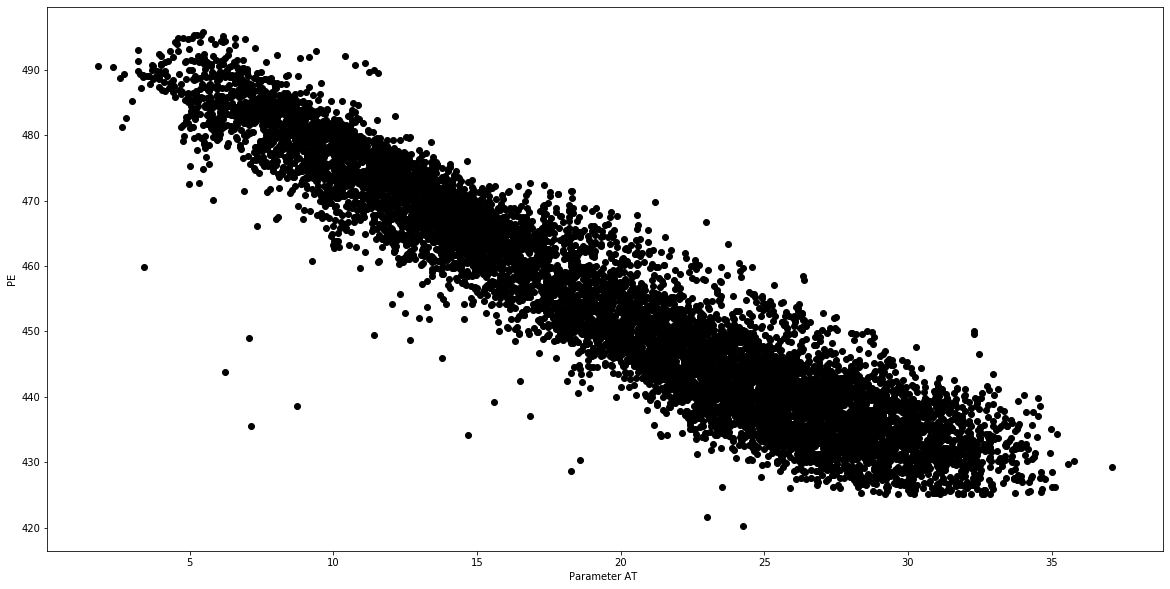

In [5]:
scatter_plot('AT', 'PE')

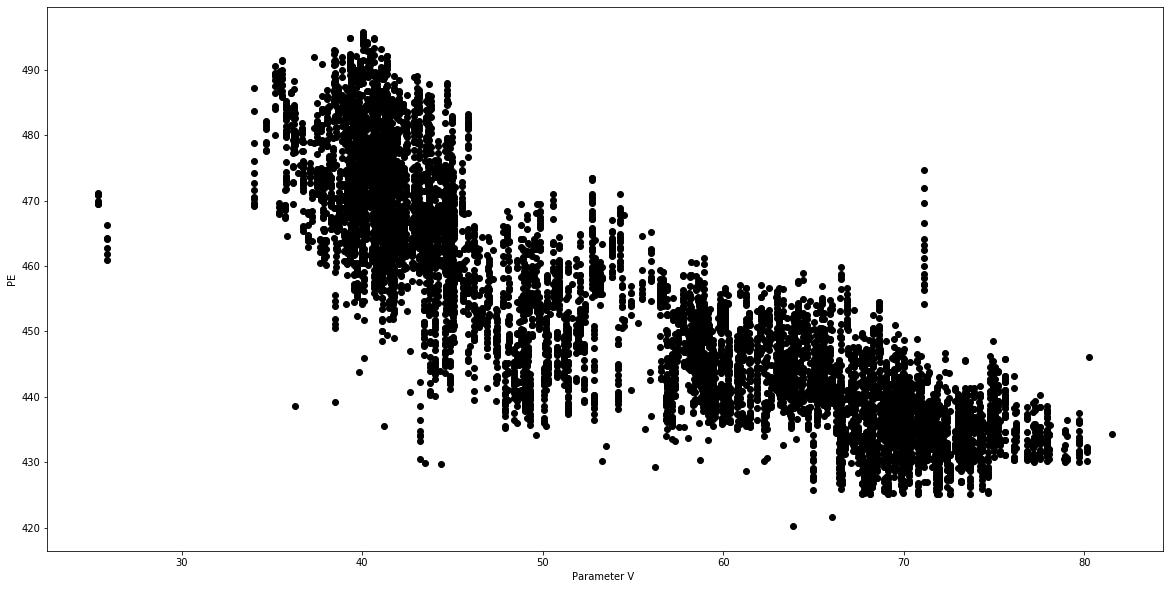

In [6]:
scatter_plot('V', 'PE')

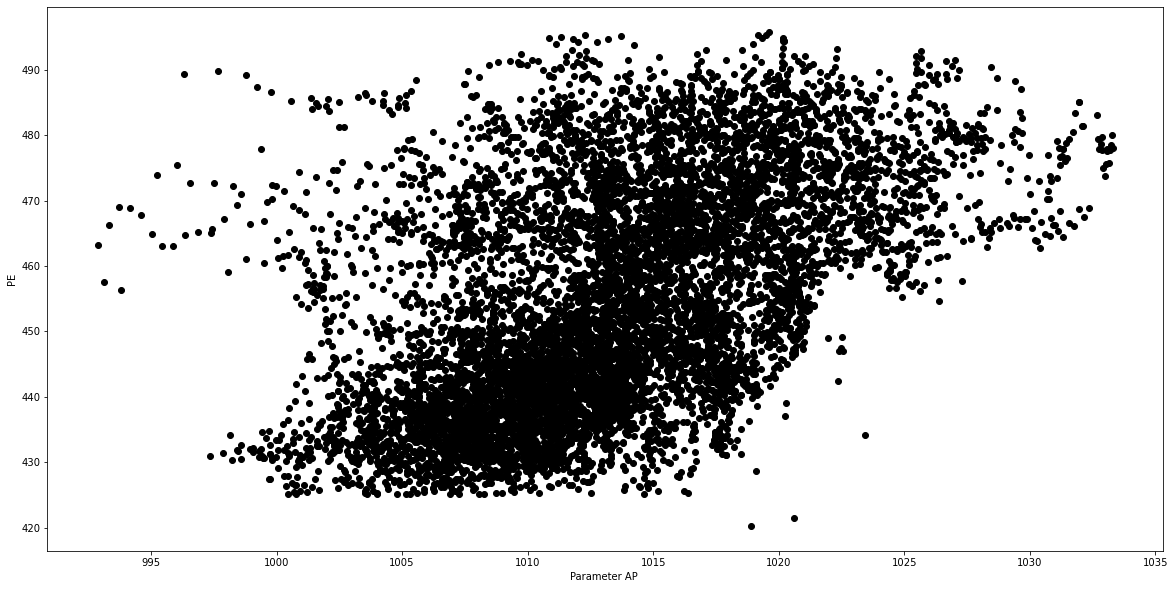

In [6]:
scatter_plot('AP', 'PE')

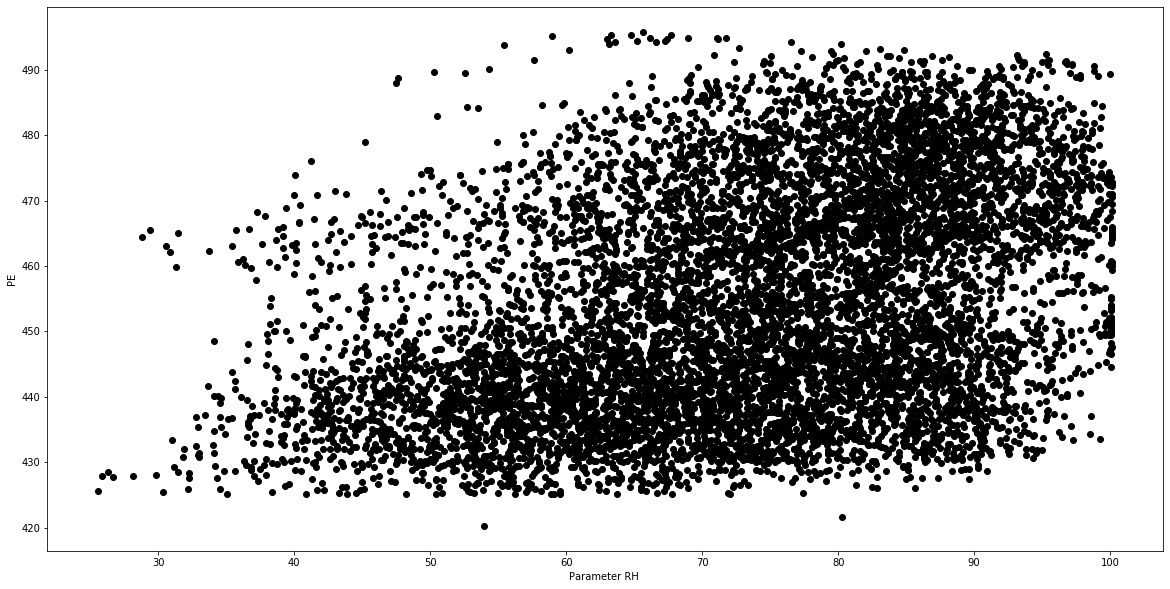

In [7]:
scatter_plot('RH', 'PE')

In [150]:
#Transforming the data frame into matrixes for further steps
#matrix of independant variables (x), and the matrix of dependant variables (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(x)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [151]:
#Feature selection using : backward elimination
import statsmodels.api as sm
xb=np.append(arr=np.ones((9568,1)).astype(int), values=x,axis=1)
x_opt= xb[:,[0,1,2,3,4]]
regressor_ols=sm.OLS(y,x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:59:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
x1            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
x2            -0.2339      0.007    -32.122      0.000      -0.248      -0.220
x3             0.0621      0.009      6.564      0.000       0.044       0.081
x4            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
#Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [153]:
# least squares regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [155]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, multioutput='variance_weighted')
regressor.coef_

array([-1.96874028, -0.23852978,  0.05697873, -0.15933335])

In [156]:
from sklearn.model_selection import cross_val_score
#k-Fold cross validation
accuracies = cross_val_score(estimator = regressor,X= x_train,y= y_train, cv = 10)

In [157]:
print("Accuracy: %0.5f (+/- %0.2f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.92756 (+/- 0.01)


In [158]:
# Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, cv=5)

ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [159]:
ridge_regressor.best_params_

{'alpha': 1e-08}

In [160]:
print(ridge_regressor.best_score_ )     #r2_score
#k-Fold cross validation
accuracies = cross_val_score(estimator = ridge_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.5f (+/- %0.2f)" % (accuracies.mean(), accuracies.std()))

0.9275651221214363
Accuracy: 0.92756 (+/- 0.01)


In [110]:
#Lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)

lasso_regressor.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49452.758197935225, tolerance: 177.8571431532288
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44055.95012348116, tolerance: 174.40435623628613
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32063.16613842144, tolerance: 177.34169016460888
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [162]:
print(lasso_regressor.best_score_)
#k-Fold cross validation
accuracies = cross_val_score(estimator = lasso_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracies.mean(), accuracies.std()))

0.9275651300204331


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52652.12821789923, tolerance: 159.41616157434487
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39794.26791543908, tolerance: 157.5167189698657
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38084.1648270256, tolerance: 160.50440081938478
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Accuracy: 0.92756 (+/- 0.00633)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42149.93847522179, tolerance: 158.60472788185447
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48179.65692833148, tolerance: 160.77553379692978
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50376.380878229174, tolerance: 160.15561514535378
  positive)


In [163]:
r2Vector=[r2_score(y_test, y_pred, multioutput='variance_weighted'),ridge_regressor.best_score_,lasso_regressor.best_score_]

In [164]:
r2Vector

[0.9321860060402447, 0.9275651221214363, 0.9275651300204331]

In [194]:
#Forward Selection(sfs)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 10)

In [195]:
sfs.fit(x, y)
sfs.k_feature_idx_


(0, 1, 2, 3)

In [193]:
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.89991307, 0.89424043, 0.90935421, 0.89448897, 0.903133  ,
         0.90169034, 0.88619805, 0.89709122, 0.89961906, 0.88972507,
         0.91416427, 0.90663182, 0.90135126, 0.89349314, 0.90448332,
         0.89650995, 0.89010783, 0.88330421, 0.90275473, 0.90405452]),
  'avg_score': 0.898615423517317,
  'feature_names': ('0',)},
 2: {'feature_idx': (0, 3),
  'cv_scores': array([0.92455574, 0.92049461, 0.93153779, 0.91776533, 0.92567037,
         0.92610844, 0.90681238, 0.92078541, 0.92227138, 0.92124082,
         0.93445543, 0.92833454, 0.92217668, 0.92174422, 0.91868873,
         0.91094683, 0.91317845, 0.90591271, 0.92001293, 0.92108611]),
  'avg_score': 0.9206889453938507,
  'feature_names': ('0', '3')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.92868153, 0.92966941, 0.93470664, 0.92738077, 0.93172123,
         0.9325222 , 0.912931  , 0.92754532, 0.93037448, 0.92915161,
         0.94217981, 0.93273797, 0.92895378, 0.930505